<a href="https://colab.research.google.com/github/rubyclaguna/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
example_user.time_on_site = 30

AttributeError: ignored

In [0]:
from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
import numpy as np
np.random.normal(10,2)


9.72758805113715

In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = np.random.normal(9.4*60,3*60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = np.random.normal(7.5*60,2*60)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
users[:10]

[User(purchased=True, time_on_site=436.29589732068325, mobile=True),
 User(purchased=True, time_on_site=458.7643760094529, mobile=True),
 User(purchased=False, time_on_site=586.3753096973277, mobile=True),
 User(purchased=False, time_on_site=376.2068023588225, mobile=True),
 User(purchased=False, time_on_site=430.12943868261766, mobile=True),
 User(purchased=True, time_on_site=571.8031193802858, mobile=True),
 User(purchased=True, time_on_site=671.9295143141686, mobile=False),
 User(purchased=False, time_on_site=432.54790758099256, mobile=True),
 User(purchased=True, time_on_site=842.7255897779262, mobile=False),
 User(purchased=True, time_on_site=595.6037618295561, mobile=True)]

In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,436.295897,True
1,True,458.764376,True
2,False,586.375310,True
3,False,376.206802,True
4,False,430.129439,True


In [0]:
user_data['time_on_site_min'] = user_data['time_on_site']/60
user_data.head()

,purchased,time_on_site,mobile,time_on_site_min
0,True,436.295897,True,7.271598
1,True,458.764376,True,7.646073
2,False,586.375310,True,9.772922
3,False,376.206802,True,6.270113
4,False,430.129439,True,7.168824


Text(0.5, 1.0, 'Time on Site')

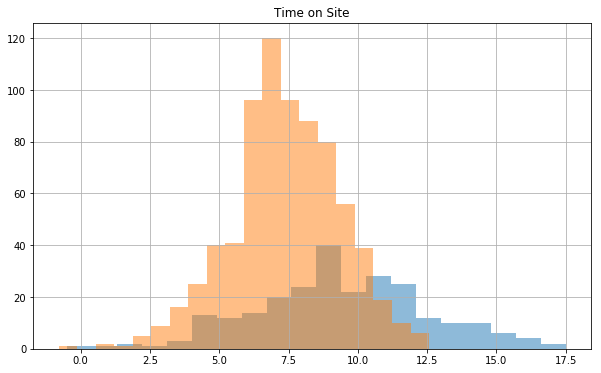

In [0]:
import matplotlib.pyplot as plt
user_data.groupby('mobile').time_on_site_min.hist(bins = 20, alpha = 0.5, figsize = (10,6))
plt.title('Time on Site')

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,104.97960724315573,115.85718684940548,123.21330690211971,142.99668528943295,145.70996776272438,151.4560580238459,155.91625959521673,157.91359492544728,159.01434582968915,159.80924462817836,163.62420854174974,175.94998959963277,183.50918001068322,184.39525449476304,186.20452078405975,194.24402046323985,194.96232045545077,196.24055079890218,198.14996729170326,199.2319191267809,200.38952068252718,202.40672130848628,207.77463415376877,210.88652781989708,212.0462270688689,213.89796928874222,214.12804979994655,217.5537037931239,219.2432461188055,226.07563057613964,227.60886149665856,228.98790295640146,230.912236997435,233.04394753689343,236.47449486499622,239.1380641331141,239.38644515828491,240.31441873410495,240.86824302597205,242.28412598862406,...,761.5163606185846,767.0078264129809,767.6526436305519,769.2762443313624,769.5949342308393,770.6516762731073,771.4199118547272,772.7077813842451,773.8696650922948,780.4600529234749,781.6046108537095,782.1812238042244,783.8948690039776,793.2366004862264,795.716456087193,819.5699609386636,825.9263664776797,832.0730463317768,834.5495648534226,841.5057469093758,847.4006912288007,848.2016766410798,848.2556425158515,861.6125615710814,866.3379440772272,872.5125783668893,872.9125198425413,894.552889528766,895.1727860182377,899.6492770964123,900.3976403200301,900.9654798542767,906.0324334788963,906.9432007944746,910.3994610976687,933.3483240197418,936.4849395368753,963.9239695853638,969.0724184627888,1024.7993551548618
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,0,0,0,1,0,1,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,...,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0
True,0,1,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,...,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,0,0,1,1,1,1,1,1,1,0,1,0,1


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site_min'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'], normalize = 'columns')

purchased,False,True
time_on_site_min,,
"(-0.817, 2.861]",0.028235,0.012174
"(2.861, 6.521]",0.308235,0.212174
"(6.521, 10.182]",0.548235,0.603478
"(10.182, 13.842]",0.103529,0.142609
"(13.842, 17.502]",0.011765,0.029565


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(-0.817, 2.861]",0.028235,0.012174
"(2.861, 6.521]",0.308235,0.212174
"(6.521, 10.182]",0.548235,0.603478
"(10.182, 13.842]",0.103529,0.142609
"(13.842, 17.502]",0.011765,0.029565


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.552,0.382667
True,0.448,0.617333


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize = 'columns')

purchased            False               True           
mobile               False     True      False     True 
time_on_site_min                                        
(-0.817, 2.861]   0.036232  0.024390  0.000000  0.015119
(2.861, 6.521]    0.166667  0.376307  0.125000  0.233261
(6.521, 10.182]   0.514493  0.564460  0.348214  0.665227
(10.182, 13.842]  0.246377  0.034843  0.375000  0.086393
(13.842, 17.502]  0.036232  0.000000  0.151786  0.000000

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [153]:
persons = 'https://raw.githubusercontent.com/rubyclaguna/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'
df= pd.read_csv(persons)
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [154]:
from collections import namedtuple

Person = namedtuple('Person',['age', 'weight', 'exercise_time'])
example_user = Person(35,160,100)
example_user

Person(age=35, weight=160, exercise_time=100)

In [169]:
import numpy as np 
for _ in range (600):
  weight = np.random.normal (0,200) 
  exercise_time = np.random.normal (100, 500)
  df.append[df(exercise_time, weight, True)]
  
for _ in range (600): 
  weight = np.random.normal(200,500) 
  exercise_time = np.random.normal (0,100)
  df.append[df(exercise_time, weight, False)]
  
random.shuffle(users)
users[:10]

TypeError: ignored

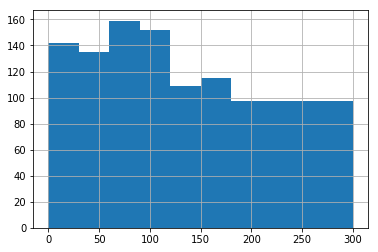

In [145]:
df.exercise_time.hist();

In [170]:
import matplotlib.pyplot as plt 
plt.scatter(df['weight'], df['exercise_time'])
plt.show()

TypeError: ignored

In [152]:
pd.crosstab(df['weight'], df['exercise_time'])

exercise_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0


In [168]:
weight_bins = pd.cut(df['exercise_time'], 10)
pd.crosstab(weight_bins, df['exercise_time'], normalize ='columns')

TypeError: ignored

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)